<a href="https://colab.research.google.com/github/Kasyap3/ML_problems/blob/main/WINE_QUALITY_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
wine_dataset=pd.read_csv('/content/winequality-red.csv')
wine_dataset.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_dataset.shape

(1599, 12)

In [ ]:
wine_dataset['quality'].value_counts()
wine_dataset['pH'].value_counts()
wine_dataset['density'].value_counts()

0.99720    36
0.99760    35
0.99680    35
0.99800    29
0.99620    28
           ..
0.99517     1
0.99379     1
0.99270     1
0.99719     1
0.99468     1
Name: density, Length: 436, dtype: int64

In [ ]:
wine_dataset.shape

(1599, 12)

In [ ]:
wine_dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
wine_dataset.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


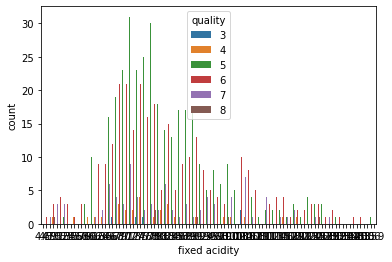

In [ ]:
# for measuring quality what diff values are there at what count
# for fixed acidity
sns.countplot(x='fixed acidity',hue='quality',data=wine_dataset)

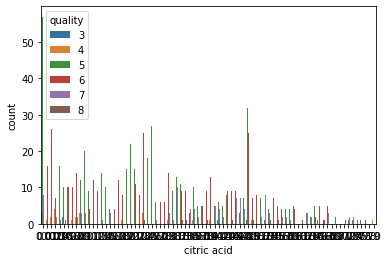

In [ ]:
#for citric acid
sns.countplot(x='citric acid',hue='quality',data=wine_dataset)

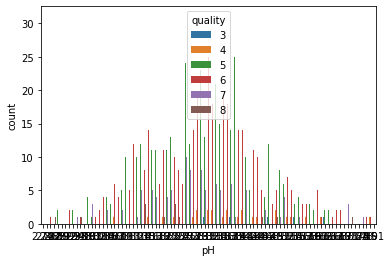

In [ ]:
#for ph
sns.countplot(x='pH',hue='quality',data=wine_dataset)
#n, bins, patches = plt.hist(wine_dataset)

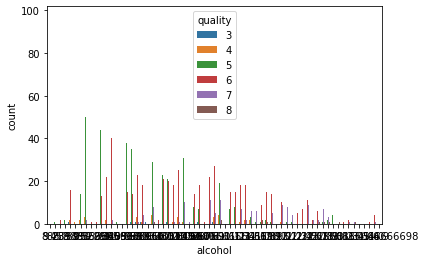

In [ ]:
#for alchol
sns.countplot(x='alcohol',hue='quality',data=wine_dataset)

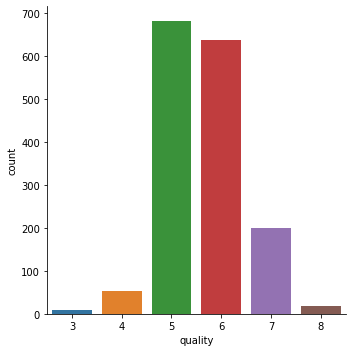

In [ ]:
#to see all the qualities for all the featues we use a catplot
#it is like a sigma func. of all individual graphs
sns.catplot(x='quality',data=wine_dataset,kind='count')

#kind means what type of calculation requires


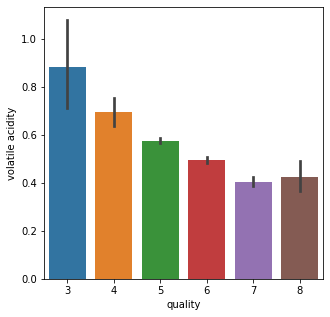

In [ ]:
#finding feature x vs y
#it is from barplot
#for volatile acidity
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_dataset)

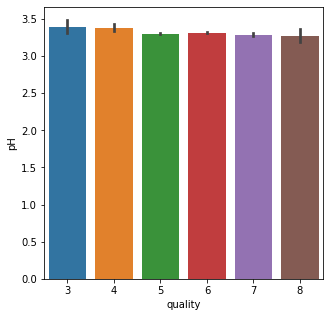

In [ ]:
#for pH
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='pH',data=wine_dataset)

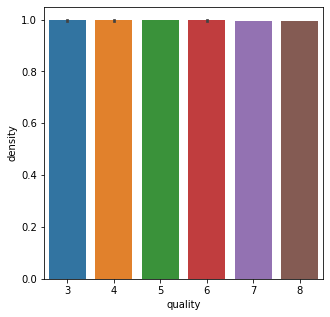

In [ ]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='density',data=wine_dataset)

In [ ]:
#for citric acid
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wine_dataset)

NameError: ignored

In [ ]:
#it is difficult to look the relation between all the features seperately
#so, we use the correlation heat map 
#positive correlation ---> if x increases then y also increases
#negative correlation ---> if x increases then y decreases
correlation=wine_dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

NameError: ignored

In [ ]:
print(correlation['quality'])

NameError: ignored

In [ ]:
#remove the target variable
X=wine_dataset.drop('quality',axis=1)
Y=wine_dataset['quality'].apply(lambda y_value:1 if y_value>=7 else 0)
# if the quality value is 7--> good quality wine
# if the quality values is less than 7 --> bad quality wine
print(X)
print(Y)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [ ]:
#traing the model
#Random forest
model= RandomForestClassifier()
model.fit(X_train, Y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# accuracy on testing data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy : ', test_data_accuracy)


input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

Accuracy :  0.934375
[0]
Bad Quality Wine
